In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
from math import *

In [3]:
files = [file for file in os.listdir("./201719Data")]
all_years_data = pd.DataFrame()
for file in files:
    df = pd.read_csv("./201719Data/"+file)
    all_years_data = pd.concat([all_years_data, df])

all_years_data.to_csv("201719Portland.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (12,18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
all_data = pd.read_csv("201719Portland.csv")

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (18) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
all_data.head()

,RouteID,PaymentPlan,StartHub,StartLatitude,StartLongitude,StartDate,StartTime,EndHub,EndLatitude,EndLongitude,...,BikeName,Distance_Miles,Duration,RentalAccessPath,MultipleRental,Start_Latitude,Start_Longitude,End_Latitude,End_Longitude,Distance_Miles_
0,4686114.0,Subscriber,NW 22nd at LoveJoy,45.529760,-122.696643,10/1/2017,0:05,NW Broadway at Everett,45.525079,-122.677556,...,0642 BIKETOWN,1.51,0:13:04,keypad,False,NaN,NaN,NaN,NaN,NaN
1,4686153.0,Casual,NaN,45.522941,-122.688602,10/1/2017,0:17,SW 3rd at Ankeny,45.522479,-122.673297,...,0057 BIKETOWN,0.78,0:05:11,keypad,False,NaN,NaN,NaN,NaN,NaN
2,4686156.0,Subscriber,NaN,45.521622,-122.682415,10/1/2017,0:18,SW Morrison at 18th,45.521960,-122.689677,...,0026 BIKETOWN,0.43,0:03:58,keypad,False,NaN,NaN,NaN,NaN,NaN
3,4686164.0,Casual,SW Morrison at Pioneer Courthouse Sq.,45.519289,-122.679249,10/1/2017,0:21,NW 13th at Marshall,45.530804,-122.684423,...,0819 BIKETOWN,1.02,0:11:30,keypad,False,NaN,NaN,NaN,NaN,NaN
4,4686166.0,Subscriber,NaN,45.531477,-122.684482,10/1/2017,0:22,NaN,45.536071,-122.685271,...,0388 BIKETOWN,0.93,0:13:40,keypad_rfid_card,False,NaN,NaN,NaN,NaN,NaN


In [4]:
del all_data['RouteID']
del all_data['StartLatitude']
del all_data['StartLongitude']
del all_data['EndLatitude']
del all_data['EndLongitude']
del all_data['RentalAccessPath']
del all_data['MultipleRental']
del all_data['Start_Latitude']
del all_data['Start_Longitude']
del all_data['End_Latitude']
del all_data['End_Longitude']
del all_data['Distance_Miles_']
del all_data['TripType']
del all_data['Distance_Miles']

In [5]:
all_data.head()

,PaymentPlan,StartHub,StartDate,StartTime,EndHub,EndDate,EndTime,BikeID,BikeName,Duration
0,Subscriber,NW 22nd at LoveJoy,10/1/2017,0:05,NW Broadway at Everett,10/1/2017,0:18,6563.0,0642 BIKETOWN,0:13:04
1,Casual,NaN,10/1/2017,0:17,SW 3rd at Ankeny,10/1/2017,0:22,6273.0,0057 BIKETOWN,0:05:11
2,Subscriber,NaN,10/1/2017,0:18,SW Morrison at 18th,10/1/2017,0:22,7280.0,0026 BIKETOWN,0:03:58
3,Casual,SW Morrison at Pioneer Courthouse Sq.,10/1/2017,0:21,NW 13th at Marshall,10/1/2017,0:33,6274.0,0819 BIKETOWN,0:11:30
4,Subscriber,NaN,10/1/2017,0:22,NaN,10/1/2017,0:36,7112.0,0388 BIKETOWN,0:13:40


In [6]:
all_data['StartDate'] = all_data['StartDate'] + ' ' + all_data['StartTime']
all_data['EndDate'] = all_data['EndDate'] + ' ' + all_data['EndTime']


In [7]:
all_data.head()

,PaymentPlan,StartHub,StartDate,StartTime,EndHub,EndDate,EndTime,BikeID,BikeName,Duration
0,Subscriber,NW 22nd at LoveJoy,10/1/2017 0:05,0:05,NW Broadway at Everett,10/1/2017 0:18,0:18,6563.0,0642 BIKETOWN,0:13:04
1,Casual,NaN,10/1/2017 0:17,0:17,SW 3rd at Ankeny,10/1/2017 0:22,0:22,6273.0,0057 BIKETOWN,0:05:11
2,Subscriber,NaN,10/1/2017 0:18,0:18,SW Morrison at 18th,10/1/2017 0:22,0:22,7280.0,0026 BIKETOWN,0:03:58
3,Casual,SW Morrison at Pioneer Courthouse Sq.,10/1/2017 0:21,0:21,NW 13th at Marshall,10/1/2017 0:33,0:33,6274.0,0819 BIKETOWN,0:11:30
4,Subscriber,NaN,10/1/2017 0:22,0:22,NaN,10/1/2017 0:36,0:36,7112.0,0388 BIKETOWN,0:13:40


In [8]:
del all_data['StartTime']
del all_data['EndTime']
del all_data['BikeName']

In [9]:
all_data['StartDate'] = pd.to_datetime(all_data["StartDate"])
all_data['EndDate'] = pd.to_datetime(all_data["EndDate"])
all_data['year'] = all_data["StartDate"].dt.year
all_data['month'] = all_data["StartDate"].dt.month

In [10]:
all_data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,Duration,year,month
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,0:13:04,2017.0,10.0
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,0:05:11,2017.0,10.0
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,0:03:58,2017.0,10.0
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,0:11:30,2017.0,10.0
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,0:13:40,2017.0,10.0


In [11]:
all_data['Starthour'] = all_data['StartDate'].dt.hour
all_data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,Duration,year,month,Starthour
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,0:13:04,2017.0,10.0,0.0
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,0:05:11,2017.0,10.0,0.0
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,0:03:58,2017.0,10.0,0.0
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,0:11:30,2017.0,10.0,0.0
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,0:13:40,2017.0,10.0,0.0


In [13]:
all_data['dayofweek'] = all_data['StartDate'].dt.day_name()
all_data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,Duration,year,month,Starthour,dayofweek
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,0:13:04,2017.0,10.0,0.0,Sunday
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,0:05:11,2017.0,10.0,0.0,Sunday
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,0:03:58,2017.0,10.0,0.0,Sunday
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,0:11:30,2017.0,10.0,0.0,Sunday
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,0:13:40,2017.0,10.0,0.0,Sunday


In [133]:
# Save cleaned data to a csv file to begin analysis
cleaned_data = all_data
cleaned_data.to_csv("201719PortlandCleaned.csv", index=False)

In [19]:
fin_data = pd.read_csv("201719PortlandCleaned.csv")
fin_data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,year,month,Starthour,dayofweek,DurationMin
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,2017.0,10.0,0.0,Sunday,13.066667
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,2017.0,10.0,0.0,Sunday,5.183333
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,2017.0,10.0,0.0,Sunday,3.966667
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,2017.0,10.0,0.0,Sunday,11.500000
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,2017.0,10.0,0.0,Sunday,13.666667


In [20]:
no_outliers_data = fin_data[fin_data['DurationMin'] < 240]
no_outliers_data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,year,month,Starthour,dayofweek,DurationMin
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,2017.0,10.0,0.0,Sunday,13.066667
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,2017.0,10.0,0.0,Sunday,5.183333
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,2017.0,10.0,0.0,Sunday,3.966667
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,2017.0,10.0,0.0,Sunday,11.500000
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,2017.0,10.0,0.0,Sunday,13.666667


In [21]:
no_outliers_data['DurationMin'].describe()

count    1.025848e+06
mean     2.230522e+01
std      2.597807e+01
min      1.000000e+00
25%      7.166667e+00
50%      1.320000e+01
75%      2.663333e+01
max      2.399833e+02
Name: DurationMin, dtype: float64

In [37]:
no_outliers_data['year']=no_outliers_data['year'].astype(int)
no_outliers_data['month']=no_outliers_data['month'].astype(int)
no_outliers_data['Starthour']=no_outliers_data['Starthour'].astype(int)

<ipython-input-37-e3037abdbd92>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_data['year']=no_outliers_data['year'].astype(int)
<ipython-input-37-e3037abdbd92>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_outliers_data['month']=no_outliers_data['month'].astype(int)
<ipython-input-37-e3037abdbd92>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

In [40]:
cleaned_data = no_outliers_data
cleaned_data.to_csv("201719PortlandCleaned.csv", index=False)

#### Start of Data Analysis

In [2]:
data = pd.read_csv("201719PortlandCleaned.csv")
data.head()

,PaymentPlan,StartHub,StartDate,EndHub,EndDate,BikeID,year,month,Starthour,dayofweek,DurationMin
0,Subscriber,NW 22nd at LoveJoy,2017-10-01 00:05:00,NW Broadway at Everett,2017-10-01 00:18:00,6563.0,2017,10,0,Sunday,13.066667
1,Casual,NaN,2017-10-01 00:17:00,SW 3rd at Ankeny,2017-10-01 00:22:00,6273.0,2017,10,0,Sunday,5.183333
2,Subscriber,NaN,2017-10-01 00:18:00,SW Morrison at 18th,2017-10-01 00:22:00,7280.0,2017,10,0,Sunday,3.966667
3,Casual,SW Morrison at Pioneer Courthouse Sq.,2017-10-01 00:21:00,NW 13th at Marshall,2017-10-01 00:33:00,6274.0,2017,10,0,Sunday,11.500000
4,Subscriber,NaN,2017-10-01 00:22:00,NaN,2017-10-01 00:36:00,7112.0,2017,10,0,Sunday,13.666667


In [3]:
# Create dataframes for each year
grouped = data.groupby(data['year'])
df1 = grouped.get_group(2017)
df2 = grouped.get_group(2018)
df3 = grouped.get_group(2019)

In [4]:
users = data['PaymentPlan'].value_counts().keys().to_list()
count = data['PaymentPlan'].value_counts().to_list()

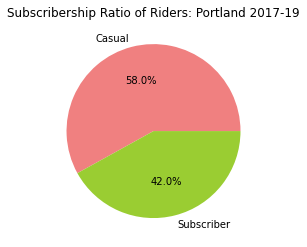

In [5]:
plt.pie(count, labels=users, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Portland 2017-19")
plt.show()

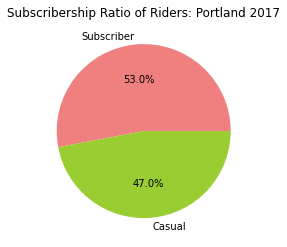

In [6]:
users_17 = df1['PaymentPlan'].value_counts().keys().to_list()
count_17 = df1['PaymentPlan'].value_counts().to_list()

plt.pie(count_17, labels=users_17, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Portland 2017")
plt.show()

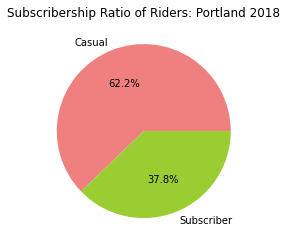

In [8]:
users_18 = df2['PaymentPlan'].value_counts().keys().to_list()
count_18 = df2['PaymentPlan'].value_counts().to_list()

plt.pie(count_18, labels=users_18, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Portland 2018")
plt.show()

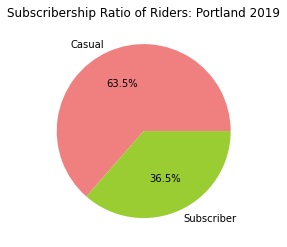

In [10]:
users_19 = df3['PaymentPlan'].value_counts().keys().to_list()
count_19 = df3['PaymentPlan'].value_counts().to_list()

plt.pie(count_19, labels=users_19, colors = ['lightcoral', 'yellowgreen'], autopct='%1.1f%%')
plt.title("Subscribership Ratio of Riders: Portland 2019")
plt.show()

In [11]:
#track ridership per year
years = data['year'].value_counts().keys().to_list()
rides = data['year'].value_counts().to_list()

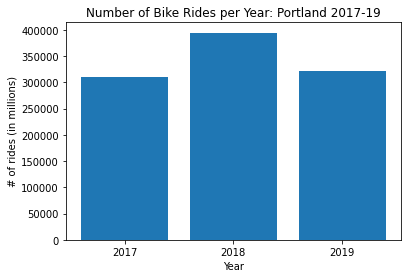

In [12]:
plt.bar(years, rides)
plt.xticks(years)
plt.xlabel("Year")
plt.ylabel("# of rides (in millions)")
plt.title("Number of Bike Rides per Year: Portland 2017-19")
plt.show()

In [13]:
num_bikes_year =[]
num_bikes1 = len(df1['BikeID'].unique())
num_bikes_year.append(num_bikes1)

In [14]:
num_bikes2 = len(df2['BikeID'].unique())
num_bikes_year.append(num_bikes2)

In [15]:
num_bikes3 = len(df3['BikeID'].unique())
num_bikes_year.append(num_bikes3)

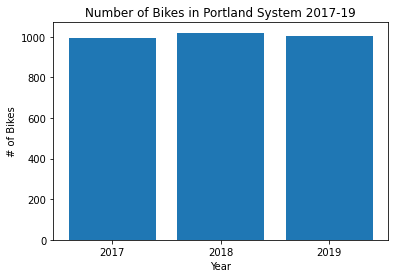

In [16]:
plt.bar([2017, 2018, 2019], num_bikes_year)
plt.xticks([2017, 2018, 2019])
plt.xlabel("Year")
plt.ylabel("# of Bikes")
plt.title("Number of Bikes in Portland System 2017-19")
plt.show()

In [17]:
#track rides by day of week over 3 year period
days = data['dayofweek'].value_counts().keys().to_list()
rides = data['dayofweek'].value_counts().to_list()
#Hardcoded the sorting into order of the week
days_sorted = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
rides_sorted = [139454,136454,139523,142688,154997,167273,145459]

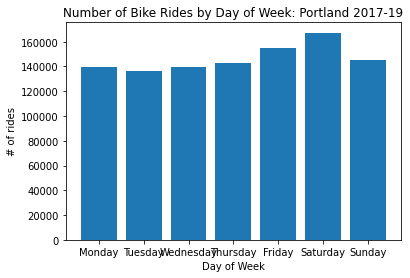

In [19]:
plt.bar(days_sorted, rides_sorted)
plt.xticks(days_sorted)
plt.xlabel("Day of Week")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Day of Week: Portland 2017-19")
plt.show()

In [20]:
#Make a data frame for weekdays and weekend
mask = data['dayofweek'].isin(['Saturday','Sunday'])
weekend_df=data[mask]
weekday_df=data[~mask]

In [21]:
weekend_hours = weekend_df['Starthour'].value_counts().keys().to_list()
weekend_count = weekend_df['Starthour'].value_counts().to_list()

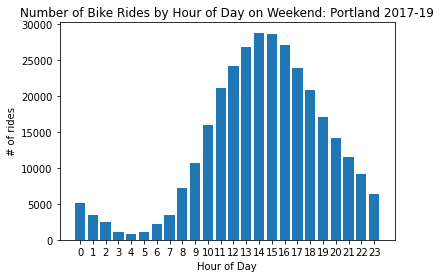

In [22]:
plt.bar(weekend_hours, weekend_count)
plt.xticks(weekend_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day on Weekend: Portland 2017-19")
plt.show()

In [23]:
weekday_hours = weekday_df['Starthour'].value_counts().keys().to_list()
weekday_count = weekday_df['Starthour'].value_counts().to_list()

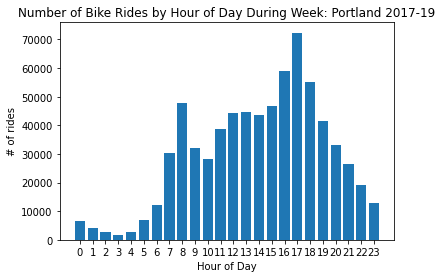

In [24]:
plt.bar(weekday_hours, weekday_count)
plt.xticks(weekday_hours)
plt.xlabel("Hour of Day")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Hour of Day During Week: Portland 2017-19")
plt.show()

In [25]:
weekend_dict = dict(zip(weekend_hours, weekend_count))
weekend_keys = (list(weekend_dict.keys()))
weekend_keys.sort()

weekend_sorted={}
for e in weekend_keys:
    weekend_sorted[e]=weekend_dict[e]

weekend_keys = list(weekend_sorted.keys())
weekend_values = list(weekend_sorted.values())

In [26]:
weekday_dict = dict(zip(weekday_hours, weekday_count))
weekday_keys = (list(weekday_dict.keys()))
weekday_keys.sort()

weekday_sorted={}
for e in weekday_keys:
    weekday_sorted[e]=weekday_dict[e]

weekday_keys = list(weekday_sorted.keys())
weekday_values = list(weekday_sorted.values())

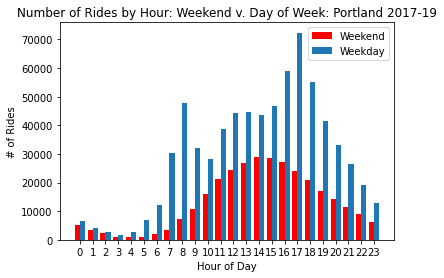

In [27]:
x = np.arange(len(weekend_keys))
ax = plt.subplot(111)
ax.bar(x-0.2, weekend_values, width=0.4, color='r', align='center', label='Weekend')
ax.bar(x+0.2, weekday_values, width=0.4, align='center', label='Weekday')
plt.xticks(weekend_keys)
plt.xlabel('Hour of Day')
plt.ylabel('# of Rides')
plt.title('Number of Rides by Hour: Weekend v. Day of Week: Portland 2017-19')
plt.legend(loc = 'best')
plt.show()

In [28]:
#track rides by month over 3 year period
months = data['month'].value_counts().keys().to_list()
num_riders = data['month'].value_counts().to_list()

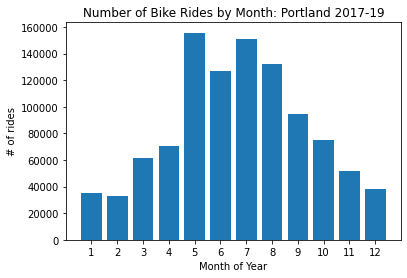

In [29]:
plt.bar(months, num_riders)
plt.xticks(months)
plt.xlabel("Month of Year")
plt.ylabel("# of rides")
plt.title("Number of Bike Rides by Month: Portland 2017-19")
plt.show()

In [30]:
#track most common and least common start stations over 3 year period
start_stations = data['StartHub'].value_counts().keys().to_list()
num_start = data['EndHub'].value_counts().to_list()

start_dict = dict(zip(start_stations, num_start))

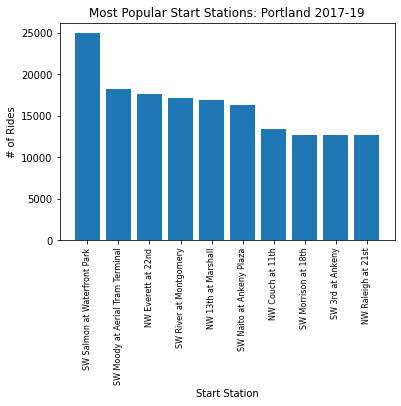

In [31]:
plt.bar(start_stations[0:10], num_start[0:10])
plt.xticks(start_stations[0:10], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Most Popular Start Stations: Portland 2017-19")
plt.show()

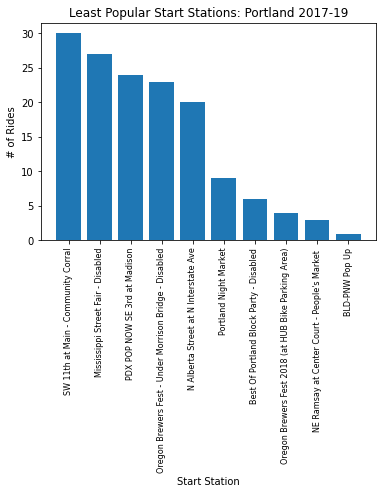

In [32]:
plt.bar(start_stations[-10:], num_start[-10:])
plt.xticks(start_stations[-10:], rotation='vertical', size=8)
plt.xlabel("Start Station")
plt.ylabel("# of Rides")
plt.title("Least Popular Start Stations: Portland 2017-19")
plt.show()

In [33]:
#track most common and leas common end stations over 3 year period
end_stations = data['EndHub'].value_counts().keys().to_list()
num_end = data['EndHub'].value_counts().to_list()

end_dict = dict(zip(end_stations, num_end))

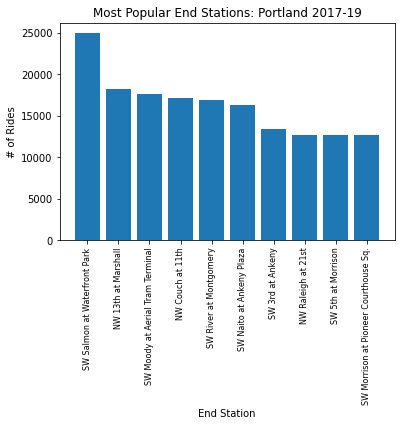

In [34]:
plt.bar(end_stations[0:10], num_end[0:10])
plt.xticks(end_stations[0:10], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Most Popular End Stations: Portland 2017-19")
plt.show()

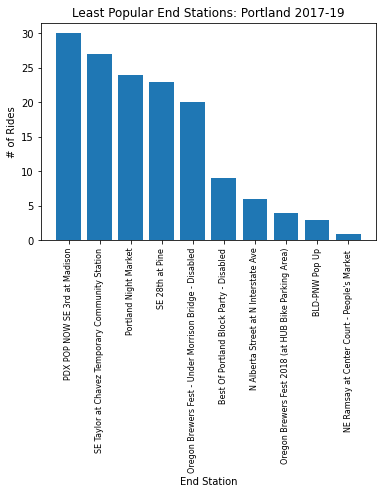

In [37]:
plt.bar(end_stations[-10:], num_end[-10:])
plt.xticks(end_stations[-10:], rotation='vertical', size=8)
plt.xlabel("End Station")
plt.ylabel("# of Rides")
plt.title("Least Popular End Stations: Portland 2017-19")
plt.show()

In [36]:
#combine start and end dicts and sort by value
def combine(d1, d2):
    new_dict=d1
    for key in d2:
        if key in new_dict:
            new_dict[key] += d2[key]
        else:
            new_dict[key]=d2[key]
    return new_dict

#Sort overall dict by value in increasing order to identify top and bottom stations
overall_dict = combine(start_dict, end_dict)
overall_dict={k: v for k, v in sorted(overall_dict.items(), key=lambda item: item[1])}


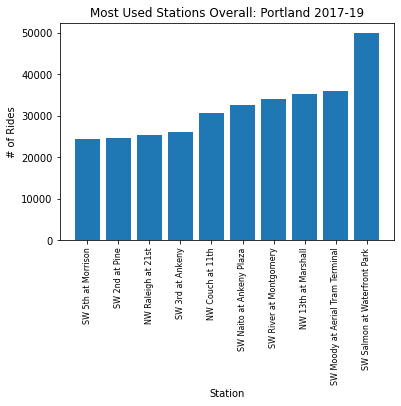

In [38]:
plt.bar((list(overall_dict.keys()))[-10:], (list(overall_dict.values()))[-10:])
plt.xticks((list(overall_dict.keys()))[-10:], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Most Used Stations Overall: Portland 2017-19")
plt.show()


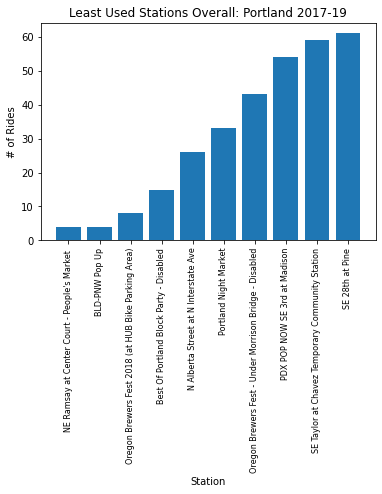

In [39]:
plt.bar((list(overall_dict.keys()))[0:10], (list(overall_dict.values()))[0:10])
plt.xticks((list(overall_dict.keys()))[0:10], rotation='vertical', size=8)
plt.xlabel("Station")
plt.ylabel("# of Rides")
plt.title("Least Used Stations Overall: Portland 2017-19")
plt.show()

In [40]:
#How does the number of stations change?
num_stations=[]
stations_2017 = len(list(pd.concat([df1['StartHub'], df1['EndHub']]).unique()))
num_stations.append(stations_2017)

In [41]:
stations_2018 = len(list(pd.concat([df2['StartHub'], df2['EndHub']]).unique()))
num_stations.append(stations_2018)

In [42]:
stations_2019 = len(list(pd.concat([df3['StartHub'], df3['EndHub']]).unique()))
num_stations.append(stations_2019)

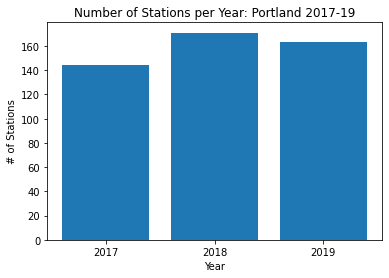

In [43]:
plt.bar([2017,2018,2019], num_stations)
plt.xticks([2017,2018,2019])
plt.xlabel("Year")
plt.ylabel("# of Stations")
plt.title("Number of Stations per Year: Portland 2017-19")
plt.show()

In [44]:
#determine tripduration statistics (min, max, average, std, etc.)
data['DurationMin'].describe()

count    1.025848e+06
mean     2.230522e+01
std      2.597807e+01
min      1.000000e+00
25%      7.166667e+00
50%      1.320000e+01
75%      2.663333e+01
max      2.399833e+02
Name: DurationMin, dtype: float64

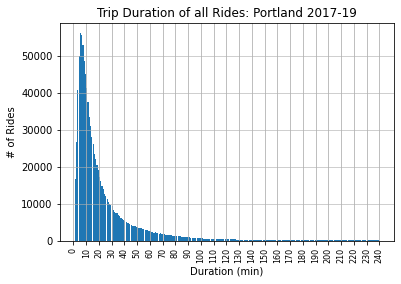

In [45]:
times = data['DurationMin']
times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of all Rides: Portland 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

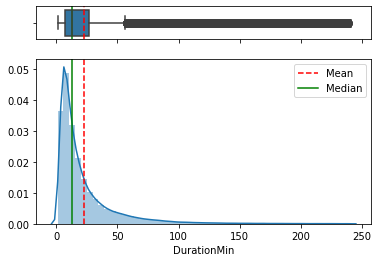

In [46]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=data['DurationMin'].mean()
median=data['DurationMin'].median()

sns.boxplot(data['DurationMin'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(data['DurationMin'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [47]:
#Subcriber v Customer Rides
grouped_user = data.groupby(data['PaymentPlan'])
df_sub = grouped_user.get_group('Subscriber')
df_cust = grouped_user.get_group('Casual')

In [48]:
df_sub['DurationMin'].describe()

count    430453.000000
mean         16.462465
std          22.547431
min           1.000000
25%           5.633333
50%           9.550000
75%          17.483333
max         239.983333
Name: DurationMin, dtype: float64

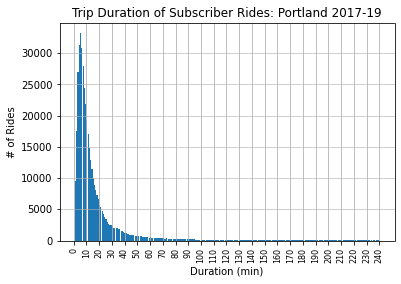

In [49]:
sub_times = df_sub['DurationMin']
sub_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Subscriber Rides: Portland 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

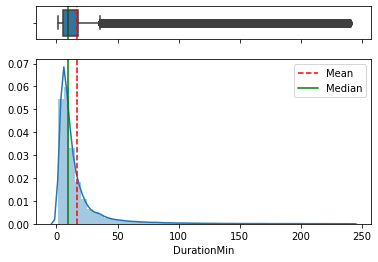

In [50]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_sub['DurationMin'].mean()
median=df_sub['DurationMin'].median()

sns.boxplot(df_sub['DurationMin'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_sub['DurationMin'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [51]:
df_cust['DurationMin'].describe()

count    595395.000000
mean         26.529358
std          27.435238
min           1.000000
25%           9.116667
50%          17.133333
75%          33.533333
max         239.983333
Name: DurationMin, dtype: float64

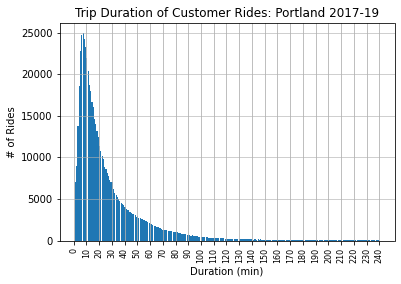

In [52]:
cust_times = df_cust['DurationMin']
cust_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Customer Rides: Portland 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

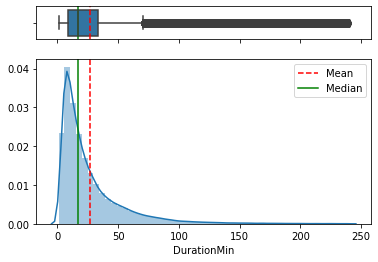

In [53]:
#Box plot and Dist plot with mean and median lines
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw= {"height_ratios": (0.2, 1)})
mean=df_cust['DurationMin'].mean()
median=df_cust['DurationMin'].median()

sns.boxplot(df_cust['DurationMin'], ax=ax_box)
ax_box.axvline(mean, color='r', linestyle='--')
ax_box.axvline(median, color='g', linestyle='-')

sns.distplot(df_cust['DurationMin'], ax=ax_hist)
ax_hist.axvline(mean, color='r', linestyle='--')
ax_hist.axvline(median, color='g', linestyle='-')

plt.legend({'Mean':mean,'Median':median})

ax_box.set(xlabel='')
plt.show()

In [54]:
weekend_df['DurationMin'].describe()

count    312732.000000
mean         27.307554
std          29.289306
min           1.000000
25%           8.633333
50%          17.283333
75%          34.733333
max         239.766667
Name: DurationMin, dtype: float64

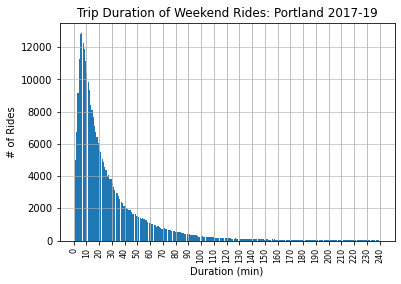

In [55]:
weekend_times = weekend_df['DurationMin']
weekend_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekend Rides: Portland 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)

In [56]:
weekday_df['DurationMin'].describe()

count    713116.000000
mean         20.111481
std          24.058674
min           1.000000
25%           6.750000
50%          11.916667
75%          23.100000
max         239.983333
Name: DurationMin, dtype: float64

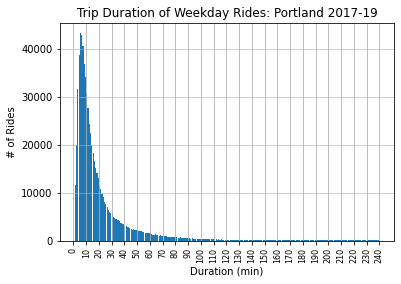

In [57]:
weekday_times = weekday_df['DurationMin']
weekday_times.plot.hist(grid=True, bins=240, rwidth=0.9)
plt.title('Trip Duration of Weekday Rides: Portland 2017-19')
plt.xlabel('Duration (min)')
plt.ylabel('# of Rides')
ticks=[]
for i in range(250):
    if i%10==0:
        ticks.append(i)
plt.xticks(ticks, rotation='vertical', size=8)

plt.grid(axis='y', alpha=0.75)